In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as scp

In [2]:
vehid = pd.read_csv('../data/trajectory/vehid.csv')
vehid = vehid[vehid.columns[1:]]
vehid.head()

,0
0,1933
1,2908
2,2367
3,1604
4,2513


In [3]:
T = pd.read_csv('../data/trajectory/T.csv')
T = T[T.columns[1:]]
T.head()

,0
0,9641.0
1,8674.0
2,8669.0
3,7839.0
4,8342.0


In [4]:
T.shape

(1505756, 1)

In [5]:
dsID = pd.read_csv('../data/trajectory/dsID.csv')
dsID = dsID[dsID.columns[1:]]
dsID.head()

,0
0,3
1,4
2,2
3,3
4,5


In [6]:
dsID.shape # previously it is 1505756

(1505756, 1)

In [7]:
pred_x = pd.read_csv('../data/trajectory/pred_x.csv')


In [8]:
pred_x = pred_x[pred_x.columns[1:]]

In [9]:
pred_x.shape # 5 step predictions, prediction steps

(5, 1505756)

In [10]:
pred_x.head() # vertical, should determine which lane it is

,0,1,2,3,4,5,6,7,8,9,...,1505746,1505747,1505748,1505749,1505750,1505751,1505752,1505753,1505754,1505755
0,0.030351,0.036198,-0.005849,-0.121567,-0.037461,-0.010939,0.004980,0.412110,0.071324,0.022597,...,0.129056,0.001036,0.016625,-0.050312,-0.010342,-0.051378,0.483355,-0.085276,-0.036589,-0.019645
1,0.062332,0.061377,-0.028936,-0.265691,-0.038047,-0.029891,0.045928,-0.507132,0.132104,0.038310,...,0.223039,0.011735,0.043471,-0.064666,0.000651,-0.091179,0.963104,-0.140100,-0.067173,-0.015445
2,0.081043,-0.007539,-0.045282,-0.340763,-0.049958,-0.031625,0.112086,-0.728127,0.193700,0.047063,...,0.272596,0.015909,0.063302,-0.092911,-0.003914,-0.115772,1.289860,-0.196980,-0.118180,-0.011354
3,0.113807,-0.046317,-0.064166,-0.376988,-0.068048,-0.047426,0.132117,-0.407473,0.210212,0.080301,...,0.244273,-0.019457,0.079770,-0.118652,-0.011434,-0.134001,1.462539,-0.221863,-0.155019,-0.023138
4,0.121767,-0.030731,-0.089130,-0.395546,-0.071678,-0.059845,0.170656,-0.395529,0.224063,0.067075,...,0.260400,-0.013842,0.075561,-0.164260,-0.019518,-0.163001,1.504016,-0.241824,-0.167535,-0.012224


In [11]:
pred_y = pd.read_csv('../data/trajectory/pred_y.csv')
pred_y = pred_y[pred_y.columns[1:]]
pred_y.shape

(5, 1505756)

In [12]:
pred_y.head()

,0,1,2,3,4,5,6,7,8,9,...,1505746,1505747,1505748,1505749,1505750,1505751,1505752,1505753,1505754,1505755
0,4.108254,4.356745,8.657238,6.705087,1.895446,1.290498,6.070808,9.331117,7.006356,4.777052,...,6.234337,5.910914,4.959196,2.509435,-0.035462,2.978322,8.781522,5.210795,5.998463,1.734553
1,8.120105,9.198644,17.315926,13.531553,3.864709,2.614229,12.110340,18.519490,13.961474,9.451141,...,12.325379,11.836508,9.944797,5.116309,0.020698,6.034065,17.352570,10.392634,12.031498,3.485264
2,12.112412,14.132226,25.967243,20.163143,5.935256,3.949959,18.078010,27.703285,20.869034,14.095183,...,18.174812,17.644150,14.924109,7.747890,0.028939,9.164824,25.740448,15.506936,18.069458,5.327453
3,15.997823,18.764004,34.662930,26.955463,8.075953,5.294002,23.966220,34.921505,27.799923,18.731503,...,23.769917,23.453209,19.945160,10.350596,0.086271,12.321418,33.758570,20.564392,24.160595,7.160710
4,19.882034,24.181889,43.396560,33.713410,10.219270,6.641768,29.973259,43.942307,34.747032,23.292610,...,29.466743,29.415337,24.994183,12.961935,0.142995,15.537272,41.751564,25.699966,30.350647,8.977222


In [13]:
ts_cen = pd.read_csv('../data/trajectory/ts_cen.csv')
ts_cen = ts_cen[ts_cen.columns[1:]]
ts_cen.shape

(1505756, 16)

In [14]:
ts_cen['dsID'] = dsID

In [15]:
ts_cen_ave = ts_cen.groupby(['dsID']).mean().reset_index(drop = True)
#ts_cen_ave = np.round(ts_cen_ave, 2)
ts_cen_ave

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000669,0.000417,0.000653,0.000517,0.000574,0.000682,0.000834,0.000982,0.001752,0.001671,0.003885,0.005680,0.009274,0.017697,0.045635,0.909078
1,0.000694,0.000355,0.000472,0.000583,0.000673,0.000802,0.000889,0.000946,0.001039,0.001230,0.001577,0.002290,0.004119,0.011270,0.034866,0.938195
2,0.000669,0.000354,0.000519,0.000567,0.000638,0.000766,0.000851,0.000933,0.001103,0.001258,0.001798,0.002641,0.004618,0.011653,0.034640,0.936992
3,0.001043,0.000890,0.001418,0.001084,0.001089,0.001197,0.001376,0.001609,0.002083,0.002501,0.003526,0.005100,0.008501,0.017766,0.051923,0.898894
4,0.000394,0.000449,0.001096,0.000429,0.000410,0.000464,0.000607,0.000750,0.001648,0.001415,0.003940,0.005856,0.009384,0.015499,0.033738,0.923920
5,0.000372,0.000421,0.001238,0.000436,0.000401,0.000434,0.000594,0.000751,0.001926,0.001458,0.004992,0.007313,0.011970,0.019183,0.041321,0.907192


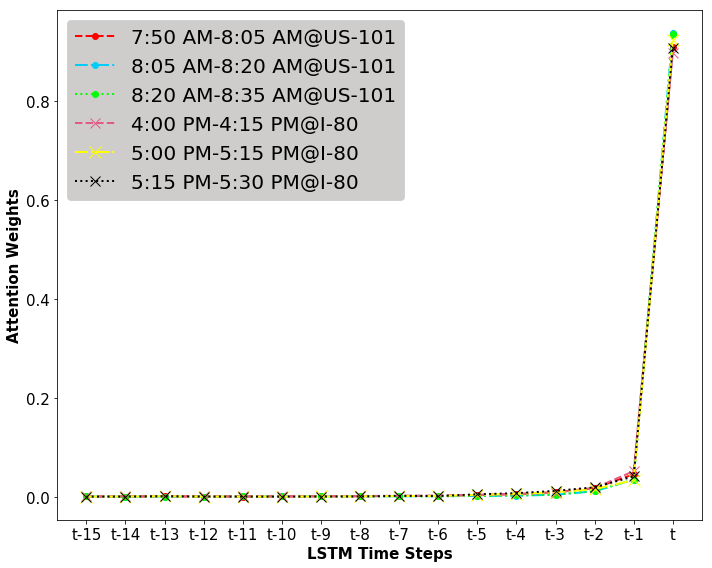

In [16]:
fig, axs = plt.subplots(1,1,figsize=(10,8)) #axs.set_facecolor('#C2C1C0') #objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15] plt.plot(x_pos[0:5], edge_15['weight'], color = '#DD8CFF', linestyle = '-', marker = 'o',linewidth=2.0, label = "Community 1") #plt.xticks(x_pos, objects)
x = [i + 0.5 for i in range(16)]

objects = ('t-15', 't-14', 't-13', 't-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1', 't')

plt.plot(x, ts_cen_ave.iloc[0, :].values, color = '#FF0000', linestyle = '--', marker = 'o', linewidth=2.0, label = "7:50 AM-8:05 AM@US-101") 
#axs.set_xlim([0, 20])
plt.xticks(x, objects)

#objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5', '5 - 6')#,'6 - 7') #x_pos = [0, 2.5, 5, 7.5, 10]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[1, :].values, color = '#00CDF9', linestyle = '-.', marker = 'o',linewidth=2.0, label = "8:05 AM-8:20 AM@US-101") #plt.xticks(x_pos, objects)

#objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5')#, '5 - 6','6 - 7') #x_pos = [0, 2.5, 5, 7.5, 10]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[2, :].values, color = '#03FD04', linestyle = ':', marker = 'o', linewidth=2.0, label = "8:20 AM-8:35 AM@US-101") #plt.xticks(x_pos, objects)

#objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5')#, '5 - 6','6 - 7') #x_pos = [0, 2.5, 5, 7.5]#12.5, 15 plt.plot(x_pos[0:4], edge_6['weight'], color = '#F28827', linestyle = '-', marker = 'x',markersize=10, linewidth=2.0, label = "Community 5") #plt.xticks(x_pos, objects)

#x_pos = [0, 2.5, 5, 7.5, 10, 12.5]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[3, :].values, color = '#E15B86', linestyle = '--', marker = 'x', markersize=10, linewidth=2.0, label = "4:00 PM-4:15 PM@I-80")

#x_pos = [0, 2.5, 5]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[4, :].values, color = '#FFFF00', linestyle = '-.', marker = 'x', markersize=12, linewidth=2.0, label = "5:00 PM-5:15 PM@I-80")

#x_pos = [0, 2.5, 5, 7.5]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[5, :].values, color = '#000000', linestyle = ':', marker = 'x',markersize=10, linewidth=2.0, label = "5:15 PM-5:30 PM@I-80")


legend = plt.legend(fontsize = 20) 
legend.get_frame().set_facecolor('#C2C1C0')

plt.ylabel('Attention Weights',fontsize=15, weight = 'bold') #plt.yticks(y_pos,['10', '20', '30', '40', '50']) #plt.title('Bike Sharing Demand by Trip Distances', fontsize=18) 
plt.xlabel('LSTM Time Steps',fontsize=15, weight = 'bold') 
plt.xticks(fontsize=15, rotation=0) 
plt.yticks(fontsize=15)

fig.tight_layout() #plt.show() plt.savefig('ave_normalized_edge_weight_vs_dist.png', bbox_inches='tight')

In [17]:
ts_nbr = pd.read_csv('../data/trajectory/ts_nbr.csv')
ts_nbr = ts_nbr[ts_nbr.columns[1:]]
ts_nbr.shape

(10857813, 16)

In [18]:
ts_nbr.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.034608,1.487108e-02,3.676446e-02,5.174632e-02,0.055080,0.058170,0.061437,0.064219,0.066172,0.067525,0.068756,0.070415,0.073382,0.079697,0.091028,0.106127
1,0.084715,5.887363e-02,5.294300e-02,5.341254e-02,0.049493,0.032569,0.012192,0.011381,0.009042,0.007176,0.005483,0.001625,0.001813,0.001363,0.020276,0.597642
2,0.000003,2.074407e-07,4.586204e-08,2.542809e-07,0.000028,0.000307,0.006010,0.038183,0.041665,0.079409,0.128488,0.138023,0.135343,0.138435,0.143483,0.150623
3,0.083367,3.443371e-02,3.617208e-02,3.586999e-02,0.035393,0.034341,0.032342,0.029665,0.026120,0.024021,0.028926,0.073026,0.123547,0.190730,0.093316,0.118730
4,0.000014,2.767934e-05,8.353007e-06,7.303859e-05,0.000050,0.000033,0.000026,0.000041,0.000042,0.000105,0.000360,0.003023,0.035816,0.137517,0.285052,0.537811


In [22]:
wt_ha = pd.read_csv('../data/trajectory/wt_ha.csv')
wt_ha.shape

(1505756, 41)

In [23]:
wt_ha = wt_ha[wt_ha.columns[1:]]
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.001112,0.001112,0.001112,0.001112,0.001112,0.001112,0.003731,0.002094,0.001112,0.001112,...,0.023288,0.001112,0.001112,0.001112,0.001112,0.017881,0.001112,0.001112,0.001112,0.709623
1,0.003668,0.003668,0.003668,0.003668,0.005252,0.003668,0.003668,0.003668,0.003668,0.003668,...,0.003668,0.003668,0.003668,0.070930,0.003668,0.003668,0.003668,0.003668,0.003668,0.591299
2,0.005985,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,...,0.044689,0.001952,0.001952,0.049286,0.001952,0.001952,0.001952,0.001952,0.001952,0.742382
3,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.010868,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.921513
4,0.000938,0.001344,0.000488,0.000938,0.000938,0.000938,0.000938,0.000938,0.000595,0.000938,...,0.009712,0.000938,0.000938,0.000938,0.000938,0.013234,0.000938,0.090846,0.000938,0.689358


In [24]:
wt_ha['dsID'] = dsID

In [25]:
wt_ha_ave = wt_ha.groupby(['dsID']).mean().reset_index(drop = True)
wt_ha_ave

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.001779,0.001438,0.001379,0.002299,0.001621,0.001329,0.002519,0.001889,0.001335,0.002671,...,0.006178,0.041855,0.007080,0.005626,0.031155,0.006344,0.003255,0.013553,0.003610,0.724367
1,0.001705,0.001418,0.001375,0.002128,0.001520,0.001329,0.002402,0.001764,0.001322,0.002568,...,0.006999,0.042483,0.007750,0.005975,0.031526,0.006379,0.003476,0.013961,0.003619,0.735927
2,0.001713,0.001411,0.001365,0.002122,0.001516,0.001320,0.002386,0.001772,0.001317,0.002577,...,0.006597,0.041351,0.007500,0.005656,0.029649,0.006096,0.003418,0.012160,0.003491,0.742178
3,0.002070,0.001606,0.001540,0.002720,0.001783,0.001476,0.002901,0.002110,0.001482,0.003136,...,0.006434,0.042928,0.006146,0.005768,0.031278,0.005598,0.003370,0.015516,0.003446,0.705036
4,0.001654,0.001115,0.001031,0.002352,0.001430,0.000977,0.002494,0.001760,0.001004,0.002667,...,0.004239,0.036737,0.003720,0.004234,0.032266,0.004112,0.002317,0.014273,0.002693,0.715829
5,0.001499,0.001160,0.001086,0.002089,0.001453,0.001044,0.002228,0.001747,0.001066,0.002370,...,0.003272,0.031201,0.003019,0.003283,0.027690,0.003329,0.001936,0.011885,0.002115,0.729443


In [23]:
i = 0
nbr_attention_ds = wt_ha_ave.iloc[i,0:39].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 39]
nbr_attention_ds

array([[0.00177887, 0.00143785, 0.00137913],
       [0.00229853, 0.00162134, 0.00132892],
       [0.00251918, 0.00188944, 0.00133499],
       [0.00267097, 0.00212954, 0.00135845],
       [0.0028247 , 0.00224338, 0.00140391],
       [0.00293858, 0.00171013, 0.00147761],
       [0.00300396, 0.72436717, 0.00175313],
       [0.00475041, 0.00582762, 0.00512477],
       [0.00659874, 0.02943364, 0.00758805],
       [0.00670428, 0.043015  , 0.00731124],
       [0.00617839, 0.04185512, 0.00708011],
       [0.00562569, 0.03115506, 0.00634449],
       [0.00325459, 0.01355321, 0.00360968]])

In [24]:
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.72, 0.  ],
       [0.  , 0.01, 0.01],
       [0.01, 0.03, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.03, 0.01],
       [0.  , 0.01, 0.  ]])

In [25]:
nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

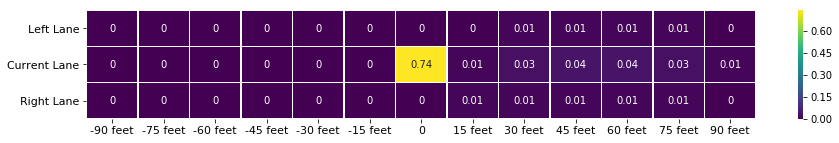

In [26]:
fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

In [28]:
nbr_loc = pd.read_csv('../data/trajectory/nbr_location.csv')
nbr_loc = nbr_loc[nbr_loc.columns[1:]]
nbr_loc.shape

(1482112, 39)

In [29]:
nbr_loc = np.reshape(nbr_loc.values, [-1, 13, 3])

In [30]:
nbr_loc = np.sum(nbr_loc, 0) # sum by first dimension
nbr_loc

array([[147764, 182269, 149434],
       [300572, 377771, 302293],
       [305682, 407442, 305376],
       [308088, 414785, 311258],
       [314879, 291149, 316995],
       [311411,  44034, 312920],
       [315060,   7718, 314903],
       [313704,  43955, 311893],
       [317845, 292420, 315395],
       [311763, 415915, 308392],
       [306271, 408401, 306369],
       [303112, 378661, 301253],
       [149743, 182644, 148274]])

In [31]:
nbr_loc = nbr_loc.T

In [32]:
nbr_loc

array([[147764, 300572, 305682, 308088, 314879, 311411, 315060, 313704,
        317845, 311763, 306271, 303112, 149743],
       [182269, 377771, 407442, 414785, 291149,  44034,   7718,  43955,
        292420, 415915, 408401, 378661, 182644],
       [149434, 302293, 305376, 311258, 316995, 312920, 314903, 311893,
        315395, 308392, 306369, 301253, 148274]])

In [26]:
D = scp.loadmat('/home/lei/workspace/data/trajectory/TestSet.mat')['traj']

In [56]:
pd.DataFrame(D).head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,2490.0,7192.0,52.000000,160.218994,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2490.0,7193.0,52.001999,164.007004,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2490.0,7194.0,51.922001,167.699005,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2490.0,7195.0,51.821999,171.539001,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2490.0,7196.0,51.813999,175.531998,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# 1-dataset ID, 2-vehicle ID, 3-frame id, 4-local x, 5-local y, 6-lane id
# 7-lateral move 8-longitunal move 
# 9-21 neighbor vehicles from back -90 feet to front 90 feet at left lane
# 22-34 ...at middle lane
# 35-47 ...at right lane
df_ts = pd.DataFrame(D)
df_ts.shape

(1505756, 47)

In [28]:
df_ts.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,2490.0,7192.0,52.000000,160.218994,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2490.0,7193.0,52.001999,164.007004,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2490.0,7194.0,51.922001,167.699005,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2490.0,7195.0,51.821999,171.539001,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2490.0,7196.0,51.813999,175.531998,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df_ts.iloc[0,8:].values

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 2486.,
          0.,    0., 2483.,    0.,    0.,    0.,    0., 2485.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.], dtype=float32)

In [30]:
df_ts.iloc[0,8:].values.reshape(3, 13).T.reshape(1, 39)

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 2485.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 2486.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 2483.,    0.,    0.,
           0.,    0.,    0.]], dtype=float32)

In [31]:
wt_ha['vehID'] = vehid
wt_ha['time_step'] = T
wt_ha['dsID'] = dsID

In [12]:
dsID1 = pd.read_csv('../data/trajectory_data/us101-0750-0805.csv',  header = None)
dsID2 = pd.read_csv('../data/trajectory_data/us101-0805-0820.csv',  header = None)
dsID3 = pd.read_csv('../data/trajectory_data/us101-0820-0835.csv', header = None)
dsID4 = pd.read_csv('../data/trajectory_data/i80-1600-1615.csv', header = None)
dsID5 = pd.read_csv('../data/trajectory_data/i80-1700-1715.csv',  header = None)
dsID6 = pd.read_csv('../data/trajectory_data/i80-1715-1730.csv',  header = None)
# first column veh ID
# 11 column veh class 1 = motorcycle, 2 = auto, 3 = truck.

In [13]:
dsID1 = dsID1[dsID1.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID1['dsID'] = 1
dsID2 = dsID2[dsID2.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID2['dsID'] = 2
dsID3 = dsID3[dsID3.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID3['dsID'] = 3
dsID4 = dsID4[dsID4.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID4['dsID'] = 4
dsID5 = dsID5[dsID5.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID5['dsID'] = 5
dsID6 = dsID6[dsID6.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID6['dsID'] = 6

In [15]:
veh_class = pd.concat([dsID1, dsID2, dsID3, dsID4, dsID5, dsID6])
veh_class.columns = ['vehID', 'veh_class', 'dsID']
veh_class.to_csv('veh_class.csv')

In [26]:
tem = dsID1[dsID1.iloc[:, 0] == 2]
tem[tem.columns[10]][0]

2

# comparison of passenger vehicle and trucks (as ego-vehicles)

In [32]:
veh_class = pd.read_csv('veh_class.csv')
veh_class = veh_class[veh_class.columns[1:]]
veh_class.head()

,vehID,veh_class,dsID
0,2,2,1
1,4,2,1
2,5,2,1
3,6,2,1
4,8,2,1


In [33]:
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,dsID,vehID,time_step
0,0.001112,0.001112,0.001112,0.001112,0.001112,0.001112,0.003731,0.002094,0.001112,0.001112,...,0.001112,0.001112,0.017881,0.001112,0.001112,0.001112,0.709623,3,1933,9641.0
1,0.003668,0.003668,0.003668,0.003668,0.005252,0.003668,0.003668,0.003668,0.003668,0.003668,...,0.070930,0.003668,0.003668,0.003668,0.003668,0.003668,0.591299,4,2908,8674.0
2,0.005985,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,...,0.049286,0.001952,0.001952,0.001952,0.001952,0.001952,0.742382,2,2367,8669.0
3,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.010868,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.921513,3,1604,7839.0
4,0.000938,0.001344,0.000488,0.000938,0.000938,0.000938,0.000938,0.000938,0.000595,0.000938,...,0.000938,0.000938,0.013234,0.000938,0.090846,0.000938,0.689358,5,2513,8342.0


In [34]:
new_wt_ha = pd.merge(wt_ha, veh_class, how='left', on=['dsID','vehID'])
new_wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,dsID,vehID,time_step,veh_class
0,0.001112,0.001112,0.001112,0.001112,0.001112,0.001112,0.003731,0.002094,0.001112,0.001112,...,0.001112,0.017881,0.001112,0.001112,0.001112,0.709623,3,1933,9641.0,2
1,0.003668,0.003668,0.003668,0.003668,0.005252,0.003668,0.003668,0.003668,0.003668,0.003668,...,0.003668,0.003668,0.003668,0.003668,0.003668,0.591299,4,2908,8674.0,2
2,0.005985,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,...,0.001952,0.001952,0.001952,0.001952,0.001952,0.742382,2,2367,8669.0,2
3,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.010868,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.921513,3,1604,7839.0,2
4,0.000938,0.001344,0.000488,0.000938,0.000938,0.000938,0.000938,0.000938,0.000595,0.000938,...,0.000938,0.013234,0.000938,0.090846,0.000938,0.689358,5,2513,8342.0,2


In [35]:
new_wt_ha_ave = new_wt_ha.groupby(['veh_class']).mean().reset_index()
new_wt_ha_ave

,veh_class,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,dsID,vehID,time_step
0,1,0.002316,0.002193,0.002130,0.002487,0.002268,0.002070,0.002587,0.002423,0.002098,...,0.004964,0.020804,0.007886,0.003672,0.010091,0.004907,0.749837,3.814937,2618.175287,7101.491190
1,2,0.001749,0.001353,0.001290,0.002309,0.001553,0.001238,0.002514,0.001846,0.001247,...,0.005177,0.031408,0.005398,0.002991,0.013920,0.003219,0.721384,3.339774,2536.616444,8517.295835
2,3,0.002042,0.001513,0.001444,0.002726,0.001653,0.001386,0.002892,0.001869,0.001399,...,0.006296,0.020678,0.005433,0.003613,0.011569,0.003376,0.795321,3.651401,2550.065341,8486.725727


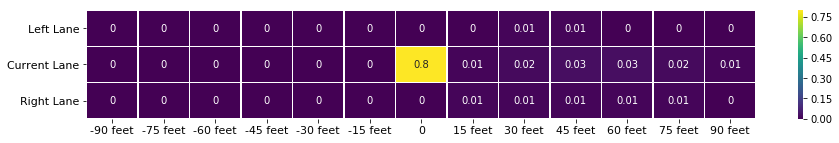

In [36]:
i = 0  #1 = motorcycle, 2 = auto, 3 = truck.
nbr_attention_ds = new_wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = new_wt_ha_ave.iloc[i, 40]
nbr_attention_ds = np.round(nbr_attention_ds, 2)

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left Lane', 'Current Lane', 'Right Lane']
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

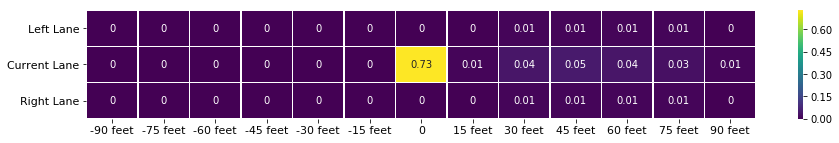

In [37]:
i = 1  #1 = motorcycle, 2 = auto, 3 = truck.
nbr_attention_ds = new_wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = new_wt_ha_ave.iloc[i, 40]
nbr_attention_ds = np.round(nbr_attention_ds, 2)

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left Lane', 'Current Lane', 'Right Lane']
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

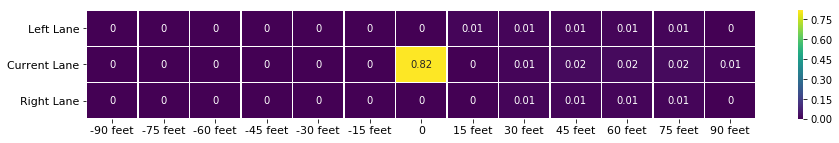

In [38]:
i = 2  #1 = motorcycle, 2 = auto, 3 = truck.
nbr_attention_ds = new_wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = new_wt_ha_ave.iloc[i, 40]
nbr_attention_ds = np.round(nbr_attention_ds, 2)

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left Lane', 'Current Lane', 'Right Lane']
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

# attention received by vehicle_class

In [39]:
vehid['dsID'] = dsID
vehid['time'] = T
vehid.columns = ['vehID', 'dsID', 'time']
#ds_ts.columns[0:2] = []

In [40]:
vehid.head()

,vehID,dsID,time
0,1933,3,9641.0
1,2908,4,8674.0
2,2367,2,8669.0
3,1604,3,7839.0
4,2513,5,8342.0


In [41]:
df_ts.columns = ['dsID', 'vehID', 'time', 'real_x', 'real_y', 'laneID', 'lateral_move', 'long_move']+ ['nbr_'+str(i) for i in range(39)]

In [42]:
df_ts = pd.merge(vehid, df_ts, how='left', on=['dsID','vehID', 'time'])
df_ts.head()

,vehID,dsID,time,real_x,real_y,laneID,lateral_move,long_move,nbr_0,nbr_1,...,nbr_29,nbr_30,nbr_31,nbr_32,nbr_33,nbr_34,nbr_35,nbr_36,nbr_37,nbr_38
0,1933,3,9641.0,29.114000,1358.112061,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1944.0,0.0,0.0,1943.0,0.0
1,2908,4,8674.0,39.734001,1457.691040,4.0,1.0,1.0,0.0,0.0,...,0.0,2935.0,0.0,0.0,0.0,2940.0,0.0,0.0,0.0,0.0
2,2367,2,8669.0,42.598000,490.649994,4.0,1.0,1.0,2382.0,0.0,...,2374.0,0.0,0.0,0.0,0.0,0.0,2366.0,0.0,0.0,0.0
3,1604,3,7839.0,19.896000,605.791016,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1602.0,0.0,0.0,1599.0,0.0,0.0,1595.0,0.0
4,2513,5,8342.0,28.628000,923.487976,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,2520.0,0.0,0.0,2518.0,0.0,0.0,2515.0,0.0


In [43]:
df_ts.shape

(1505756, 47)

In [44]:
res = []
res_ds = []
for i in range(df_ts.shape[0]):
    res_ds.append([int(df_ts.iloc[i, 1])]*39)
    tem = df_ts.iloc[i,8:].values.reshape(3, 13).T.reshape(39, 1) # cong hengxiang jishu dao zongxiang jishu 
    res.append(tem)

In [45]:
res_ds = np.concatenate(res_ds, 0)

In [46]:
res_ds.shape

(58724484,)

In [47]:
res = np.concatenate(res, 0)

In [48]:
res.shape

(58724484, 1)

In [49]:
attention = wt_ha.iloc[:, 0:39].values.reshape([-1, 1])
attention.shape

(58724484, 1)

In [51]:
res_atten = pd.DataFrame(res)
res_atten.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [52]:
res_atten['dsID'] = res_ds
res_atten['attention'] = attention

In [53]:
res_atten.columns = ['vehID', 'dsID', 'attention']

In [54]:
new_res_atten = pd.merge(res_atten, veh_class, how='left', on=['dsID','vehID'])
new_res_atten.head()

,vehID,dsID,attention,veh_class
0,0.0,3,0.001112,NaN
1,0.0,3,0.001112,NaN
2,0.0,3,0.001112,NaN
3,0.0,3,0.001112,NaN
4,0.0,3,0.001112,NaN


In [55]:
new_res_atten_ave = new_res_atten.groupby(['veh_class'])['attention'].mean()
new_res_atten_ave

veh_class
1.0    0.026456
2.0    0.030561
3.0    0.020842
Name: attention, dtype: float64

In [56]:
new_res_atten_ave = new_res_atten.groupby(['veh_class'])['attention'].std()
new_res_atten_ave

veh_class
1.0    0.045927
2.0    0.055411
3.0    0.039561
Name: attention, dtype: float64

In [57]:
new_res_atten_ave = new_res_atten.groupby(['veh_class'])['attention'].count()
new_res_atten_ave

veh_class
1.0       40813
2.0    11253428
3.0      286487
Name: attention, dtype: int64

In [58]:
# only compare the accumulated attention when passenger vehs/trucks are in the front of the current lane (25 is the index)
batch = new_res_atten.shape[0] // 39

final_res = []
#last = 0
for i in range(batch):
    #nbr_b = i // 39
    #if nbr_b != last: # avoid the duplicates, for example, 10, 24, 33, the same neighbor row will be added three times
    final_res.append(new_res_atten.iloc[[i*39 + d for d in [22, 25, 28, 31, 34, 37]],]) # the front of the current lane
    #last = nbr_b

In [60]:
final_res = pd.concat(final_res).reset_index(drop = True)
final_res.head()

,vehID,dsID,attention,veh_class
0,0.0,3,0.001112,NaN
1,0.0,3,0.001112,NaN
2,1927.0,3,0.162469,2.0
3,0.0,3,0.001112,NaN
4,0.0,3,0.001112,NaN


In [61]:
final_res['grid_index'] = [22, 25, 28, 31, 34, 37] * 1505756

In [94]:
final_res = final_res[final_res['vehID'] != 0].reset_index(drop = True)
final_res.head()

,level_0,index,vehID,dsID,attention,veh_class,grid_index
0,0,2,1927.0,3,0.162469,2.0,28
1,1,22,1594.0,3,0.001645,2.0,34
2,2,26,2519.0,5,0.146138,2.0,28
3,3,29,2514.0,5,0.090846,2.0,37
4,4,31,2755.0,5,0.166186,2.0,25


In [96]:
final_res_class2 = final_res[final_res['veh_class'] == 2].reset_index(drop = True)
final_res_class2 = final_res_class2[['attention', 'grid_index']]

In [90]:
final_res_ave = final_res.groupby(['veh_class', 'grid_index'])['attention'].mean().reset_index()
final_res_ave

,veh_class,grid_index,attention
0,1.0,22,0.048268
1,1.0,25,0.126572
2,1.0,28,0.100139
3,1.0,31,0.098563
4,1.0,34,0.094075
5,1.0,37,0.080594
6,2.0,22,0.177215
7,2.0,25,0.170841
8,2.0,28,0.153525
9,2.0,31,0.136292


In [91]:
final_res_count = final_res.groupby(['veh_class', 'grid_index'])['attention'].count().reset_index()
final_res_count

,veh_class,grid_index,attention
0,1.0,22,740
1,1.0,25,1810
2,1.0,28,1076
3,1.0,31,1285
4,1.0,34,1303
5,1.0,37,582
6,2.0,22,45873
7,2.0,25,306334
8,2.0,28,433286
9,2.0,31,423447


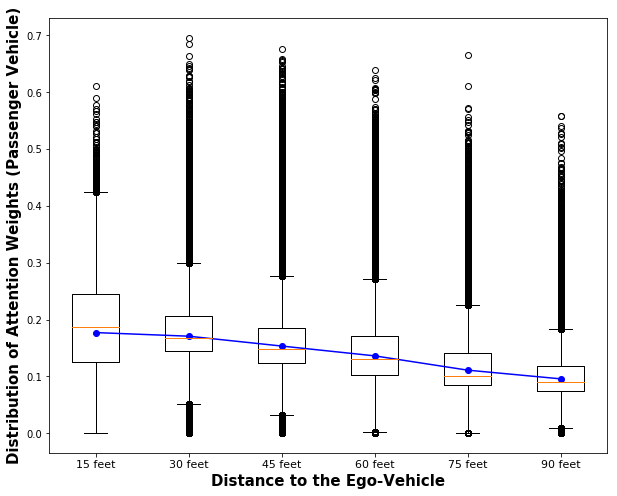

In [138]:
fig, axs = plt.subplots(1,1,figsize=(10,8))

x = [1, 2, 3, 4, 5, 6]
labels = ['15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet']

b1 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 22)]['attention'].values
b2 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 25)]['attention'].values
b3 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 28)]['attention'].values
b4 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 31)]['attention'].values
b5 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 34)]['attention'].values
b6 = final_res[(final_res['veh_class'] == 2) & (final_res['grid_index'] == 37)]['attention'].values

plt.boxplot([b1, b2, b3, b4, b5, b6])
plt.plot(x, final_res_ave['attention'][6:12].values, '-ob')
plt.xticks(x, labels, rotation=0, fontsize = 11)
plt.xlabel('Distance to the Ego-Vehicle', fontsize = 15, fontweight='bold')
plt.ylabel('Distribution of Attention Weights (Passenger Vehicle)', fontsize = 15, fontweight='bold')
plt.show()



#plt.savefig('.png', bbox_inches='tight')

array([0.17721507, 0.17084124, 0.15352457, 0.13629205, 0.11115127,
       0.09586307])

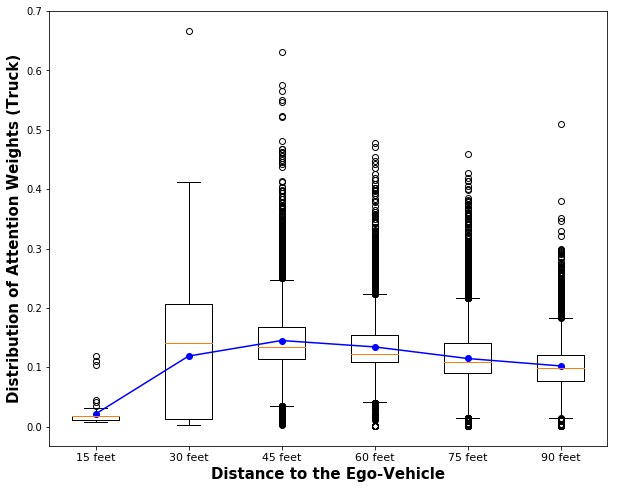

In [140]:
fig, axs = plt.subplots(1,1,figsize=(10,8))

x = [1, 2, 3, 4, 5, 6]
labels = ['15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet']

b1 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 22)]['attention'].values
b2 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 25)]['attention'].values
b3 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 28)]['attention'].values
b4 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 31)]['attention'].values
b5 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 34)]['attention'].values
b6 = final_res[(final_res['veh_class'] == 3) & (final_res['grid_index'] == 37)]['attention'].values

plt.boxplot([b1, b2, b3, b4, b5, b6])
plt.xticks(x, labels, rotation=0, fontsize = 11)
plt.plot(x, final_res_ave['attention'][12:].values, '-ob')
plt.xlabel('Distance to the Ego-Vehicle', fontsize = 15, fontweight='bold')
plt.ylabel('Distribution of Attention Weights (Truck)', fontsize = 15, fontweight='bold')
plt.show()



#plt.savefig('.png', bbox_inches='tight')

# free vs congestion

In [64]:
zeros_df = df_ts.iloc[:, 8:]
zero_count = (zeros_df == 0).astype(int).sum(axis=1)
wt_ha['neighbor_num'] = 39 - zero_count

In [65]:
wt_ha['neighbor_num'].describe()

count    1.505756e+06
mean     7.690973e+00
std      3.415456e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      2.100000e+01
Name: neighbor_num, dtype: float64

In [82]:
wt_ha['tf_con'] = 0
wt_ha.loc[wt_ha['neighbor_num'] <= 7, 'tf_con'] = 1
wt_ha.loc[(wt_ha['neighbor_num'] > 7) & (wt_ha['neighbor_num'] <=15), 'tf_con'] = 2
wt_ha.loc[wt_ha['neighbor_num'] >15, 'tf_con'] = 3
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,dsID,vehID,time_step,neighbor_num,tf_con
0,0.001112,0.001112,0.001112,0.001112,0.001112,0.001112,0.003731,0.002094,0.001112,0.001112,...,0.017881,0.001112,0.001112,0.001112,0.709623,3,1933,9641.0,7,1
1,0.003668,0.003668,0.003668,0.003668,0.005252,0.003668,0.003668,0.003668,0.003668,0.003668,...,0.003668,0.003668,0.003668,0.003668,0.591299,4,2908,8674.0,6,1
2,0.005985,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,...,0.001952,0.001952,0.001952,0.001952,0.742382,2,2367,8669.0,6,1
3,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.010868,...,0.001645,0.001645,0.001645,0.001645,0.921513,3,1604,7839.0,8,2
4,0.000938,0.001344,0.000488,0.000938,0.000938,0.000938,0.000938,0.000938,0.000595,0.000938,...,0.013234,0.000938,0.090846,0.000938,0.689358,5,2513,8342.0,12,2


In [83]:
wt_ha_ave = wt_ha.groupby(['tf_con']).mean().reset_index()
wt_ha_ave

,tf_con,0,1,2,3,4,5,6,7,8,...,34,35,36,37,38,39,dsID,vehID,time_step,neighbor_num
0,1,0.001819,0.001575,0.001536,0.002228,0.001674,0.001491,0.002462,0.001921,0.001486,...,0.029218,0.005784,0.003229,0.012280,0.003379,0.752234,2.862296,2503.652559,8575.035770,5.173391
1,2,0.001674,0.001117,0.001031,0.002395,0.001416,0.000970,0.002562,0.001754,0.000995,...,0.032877,0.004971,0.002777,0.015575,0.003044,0.694614,3.880745,2579.873977,8439.168004,10.331612
2,3,0.002007,0.000973,0.000793,0.003091,0.001587,0.000745,0.003251,0.001989,0.000801,...,0.039400,0.005064,0.002405,0.017374,0.003354,0.601143,4.797899,2533.408557,8248.709351,16.716877


In [84]:
i = 0
nbr_attention_ds = wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 40]
nbr_attention_ds

array([[0.00181867, 0.00157537, 0.00153627],
       [0.00222807, 0.0016742 , 0.00149148],
       [0.00246192, 0.00192077, 0.00148593],
       [0.00262448, 0.00210021, 0.0015015 ],
       [0.00267819, 0.00187463, 0.00153406],
       [0.00273286, 0.00163101, 0.00158583],
       [0.00269682, 0.75223413, 0.00178646],
       [0.00472271, 0.00236452, 0.0051425 ],
       [0.00677145, 0.01543611, 0.00749728],
       [0.00687547, 0.0383362 , 0.0075509 ],
       [0.00628787, 0.04003793, 0.00688014],
       [0.00539329, 0.02921798, 0.00578412],
       [0.00322858, 0.01227954, 0.00337948]])

In [85]:
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.75, 0.  ],
       [0.  , 0.  , 0.01],
       [0.01, 0.02, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.03, 0.01],
       [0.  , 0.01, 0.  ]])

In [86]:
nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

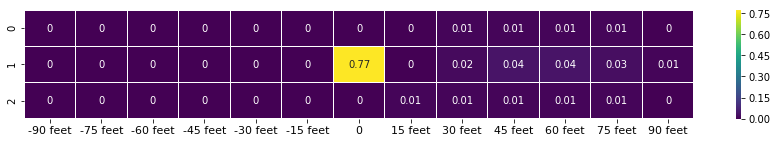

In [87]:
fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
#y_pos = [i + 0.5 for i in range(3)]
#objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
#plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

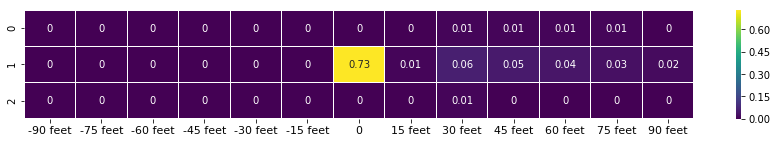

In [88]:
i = 1
nbr_attention_ds = wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 40]
nbr_attention_ds

nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
#y_pos = [i + 0.5 for i in range(3)]
#objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
#plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

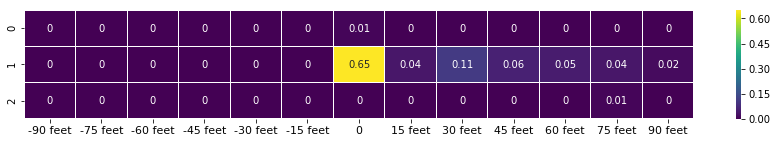

In [89]:
i = 2
nbr_attention_ds = wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 40]
nbr_attention_ds

nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
#y_pos = [i + 0.5 for i in range(3)]
#objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
#plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

# attention distribution by lane 

In [50]:
wt_ha['laneID'] = df_ts['laneID']
wt_ha['dsID'] = df_ts['dsID']
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,dsID,vehID,time_step,laneID
0,0.001112,0.001112,0.001112,0.001112,0.001112,0.001112,0.003731,0.002094,0.001112,0.001112,...,0.001112,0.017881,0.001112,0.001112,0.001112,0.709623,3,1933,9641.0,3.0
1,0.003668,0.003668,0.003668,0.003668,0.005252,0.003668,0.003668,0.003668,0.003668,0.003668,...,0.003668,0.003668,0.003668,0.003668,0.003668,0.591299,4,2908,8674.0,4.0
2,0.005985,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,...,0.001952,0.001952,0.001952,0.001952,0.001952,0.742382,2,2367,8669.0,4.0
3,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.010868,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.921513,3,1604,7839.0,2.0
4,0.000938,0.001344,0.000488,0.000938,0.000938,0.000938,0.000938,0.000938,0.000595,0.000938,...,0.000938,0.013234,0.000938,0.090846,0.000938,0.689358,5,2513,8342.0,3.0


In [51]:
wt_ha[wt_ha['laneID'] == 7].shape

(29485, 44)

In [52]:
wt_ha['laneID'].describe()

count    1.505756e+06
mean     3.449473e+00
std      1.624123e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      7.000000e+00
Name: laneID, dtype: float64

In [53]:
wt_ha_ave = wt_ha.groupby(['laneID', 'dsID']).mean().reset_index()
wt_ha_ave

,laneID,dsID,0,1,2,3,4,5,6,7,...,32,33,34,35,36,37,38,39,vehID,time_step
0,1.0,1,0.001371,0.001388,0.001304,0.001371,0.001604,0.001244,0.001371,0.001920,...,0.008024,0.001371,0.030483,0.007563,0.001371,0.012920,0.004347,0.742409,2760.369541,8275.320789
1,1.0,2,0.001440,0.001437,0.001386,0.001440,0.001556,0.001321,0.001440,0.001785,...,0.010171,0.001440,0.033501,0.007660,0.001440,0.014406,0.004412,0.758334,2367.733409,8853.051864
2,1.0,3,0.001313,0.001311,0.001251,0.001313,0.001445,0.001192,0.001313,0.001712,...,0.008659,0.001313,0.032614,0.007083,0.001313,0.012574,0.003859,0.768658,1783.523673,8795.960838
3,1.0,4,0.002623,0.002611,0.002499,0.002623,0.002681,0.002374,0.002623,0.002799,...,0.013204,0.002623,0.043145,0.011480,0.002623,0.021143,0.006639,0.729767,3066.503822,8607.911043
4,1.0,5,0.001970,0.001960,0.001850,0.001970,0.002028,0.001741,0.001970,0.002174,...,0.006809,0.001970,0.036323,0.007102,0.001970,0.014811,0.004803,0.790902,2597.735575,8111.372591
5,1.0,6,0.002100,0.002084,0.002042,0.002100,0.002187,0.001988,0.002100,0.002266,...,0.004658,0.002100,0.053870,0.004765,0.002100,0.022428,0.003492,0.783034,2468.297893,9714.411367
6,2.0,1,0.001886,0.001379,0.001303,0.002503,0.001600,0.001239,0.002770,0.001853,...,0.007582,0.005782,0.033239,0.007190,0.003377,0.014616,0.003690,0.708660,2750.305255,8241.878359
7,2.0,2,0.001770,0.001407,0.001353,0.002340,0.001509,0.001295,0.002693,0.001739,...,0.008263,0.006803,0.031942,0.007642,0.003650,0.013765,0.003978,0.723103,2342.343262,8779.907167
8,2.0,3,0.001726,0.001343,0.001283,0.002252,0.001460,0.001227,0.002537,0.001711,...,0.007893,0.005671,0.029376,0.006234,0.003213,0.013610,0.003586,0.717923,1786.412635,8732.187038
9,2.0,4,0.001735,0.001562,0.001502,0.002027,0.001726,0.001430,0.002209,0.001999,...,0.006673,0.006020,0.036556,0.005590,0.003648,0.017451,0.003482,0.706885,3051.394133,8451.313512


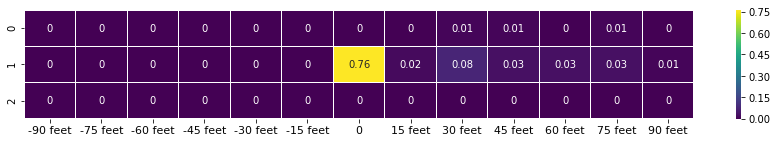

In [69]:
i = 38
nbr_attention_ds = wt_ha_ave.iloc[i,2:41].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 41]
nbr_attention_ds

nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
#y_pos = [i + 0.5 for i in range(3)]
#objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
#plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

In [54]:
wt_ha['x'] = df_ts['real_x']
wt_ha['y'] = df_ts['real_y']
wt_ha['max_attention_index'] = wt_ha.iloc[:, 0:39].idxmax(axis = 1)

In [55]:
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,dsID,vehID,time_step,laneID,x,y,max_attention_index
0,0.001112,0.001112,0.001112,0.001112,0.001112,0.001112,0.003731,0.002094,0.001112,0.001112,...,0.001112,0.001112,0.709623,3,1933,9641.0,3.0,29.114000,1358.112061,28
1,0.003668,0.003668,0.003668,0.003668,0.005252,0.003668,0.003668,0.003668,0.003668,0.003668,...,0.003668,0.003668,0.591299,4,2908,8674.0,4.0,39.734001,1457.691040,27
2,0.005985,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,0.001952,...,0.001952,0.001952,0.742382,2,2367,8669.0,4.0,42.598000,490.649994,29
3,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.010868,...,0.001645,0.001645,0.921513,3,1604,7839.0,2.0,19.896000,605.791016,9
4,0.000938,0.001344,0.000488,0.000938,0.000938,0.000938,0.000938,0.000938,0.000595,0.000938,...,0.090846,0.000938,0.689358,5,2513,8342.0,3.0,28.628000,923.487976,28


In [ ]:
# x is the vertical coordinate
# y is the horizonal coordinate

In [60]:
wt_ha_lane7_i80 = wt_ha[(wt_ha['dsID'] == 6) & (wt_ha['laneID'] == 7)].reset_index(drop = True)
wt_ha_lane7_i80 = wt_ha_lane7_i80.sort_values(by = ['y'], ascending = True)
wt_ha_lane7_i80 # so lane 7 starts at around 145-the ramp


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,dsID,vehID,time_step,laneID,x,y,max_attention_index
4762,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,...,0.000933,0.000933,0.837577,6,2468,9580.0,7.0,96.726997,145.266998,31
3542,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,...,0.000934,0.000934,0.837389,6,2468,9581.0,7.0,96.726997,145.570999,31
3843,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,0.000933,...,0.000933,0.000933,0.837228,6,2468,9582.0,7.0,96.726997,145.875000,31
4848,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,0.000934,...,0.000934,0.000934,0.836147,6,2468,9583.0,7.0,96.727997,146.175995,31
3893,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,...,0.000931,0.000931,0.835777,6,2468,9584.0,7.0,96.727997,146.483002,31
2510,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,...,0.000913,0.000913,0.838939,6,2468,9585.0,7.0,96.727997,146.802002,31
2195,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,0.000901,...,0.000901,0.000901,0.838826,6,2468,9586.0,7.0,96.728996,147.126999,31
1485,0.000925,0.000925,0.000925,0.000925,0.000925,0.000925,0.000925,0.000925,0.000925,0.000925,...,0.000925,0.000925,0.837053,6,2468,9587.0,7.0,96.727997,147.445999,31
4510,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,0.000958,...,0.000958,0.000958,0.827953,6,2468,9588.0,7.0,96.728996,147.753006,31
4563,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,...,0.000955,0.000955,0.832348,6,2468,9589.0,7.0,96.728996,148.054001,31


In [61]:
wt_ha_lane7_i80['vehID'].unique()

array([2468, 2463, 2488, 2459, 2480, 2437, 2446, 2475, 2420, 3004, 3003])

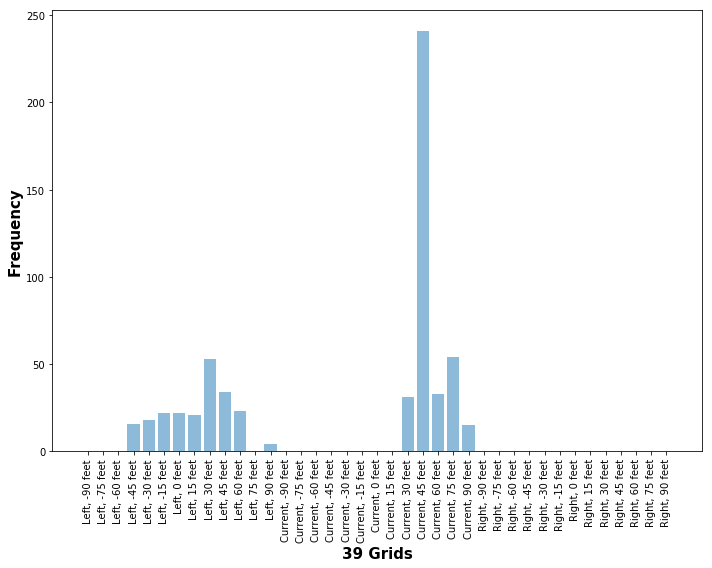

In [101]:
# lane: 6 range of y: 0-145 ds: 6 # the segment before lane 7
tem = wt_ha[(wt_ha['dsID'] == 6) & (wt_ha['laneID'] == 6) & (wt_ha['y'] >= 0) & (wt_ha['y'] <= 145)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0 feet', 
       '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
#plt.savefig('images/GPS_points_per_day_412000000_3.png', bbox_inches='tight')


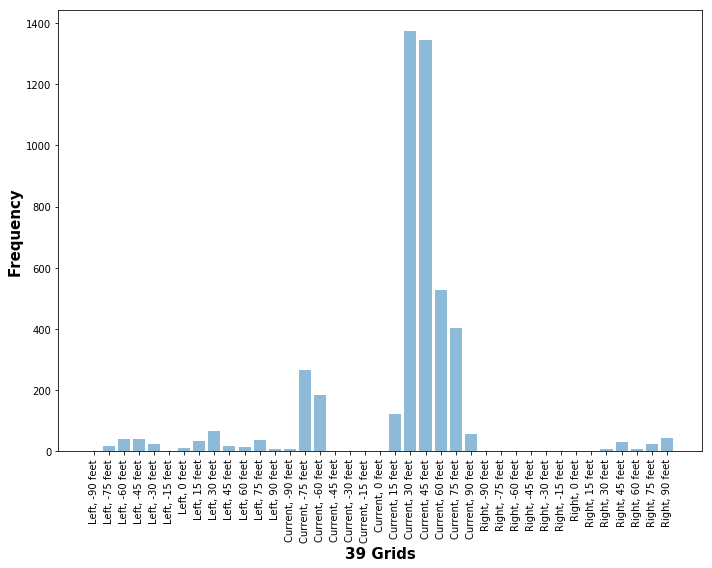

In [102]:
# lane: 6 range of y: 0-145 ds: 6 # the segment before lane 7
tem = wt_ha[(wt_ha['dsID'] == 6) & (wt_ha['laneID'] == 6) & (wt_ha['y'] >= 145) & (wt_ha['y'] <= 665)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0 feet', 
       '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
#plt.savefig('images/GPS_points_per_day_412000000_3.png', bbox_inches='tight')


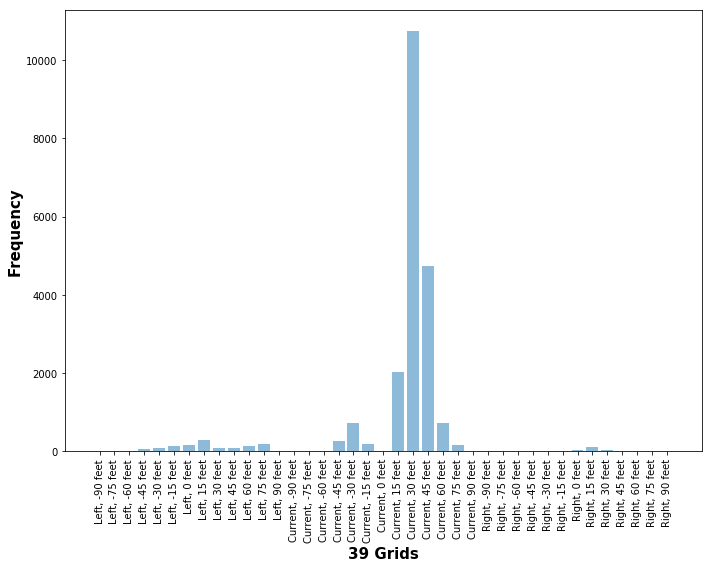

In [120]:
# lane: 6 range of y: 0-145 ds: 6 # the segment before lane 7
tem = wt_ha[(wt_ha['dsID'] == 6) & (wt_ha['laneID'] == 3)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0 feet', 
       '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
#plt.savefig('images/GPS_points_per_day_412000000_3.png', bbox_inches='tight')


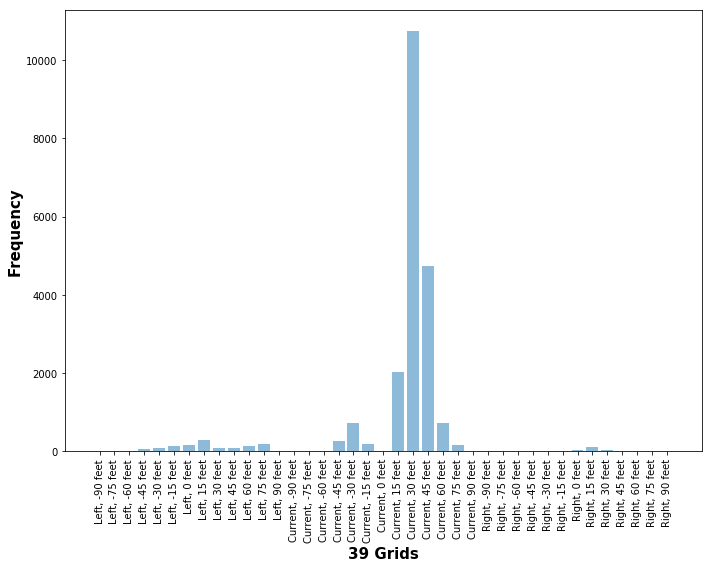

In [115]:
# lane: 6 range of y: 0-145 ds: 6 # the segment before lane 7
tem = wt_ha[(wt_ha['dsID'] == 6) & (wt_ha['laneID'] == 3)].reset_index(drop = True)
tem = tem[tem['max_attention_index'] != '0'] # delete scenarios where all weights are equal
tem_count = tem.groupby(['max_attention_index']).size().reset_index(name = 'freq')
lane = ['Left', 'Current', 'Right']
feet = ['-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0 feet', 
       '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet']

coordinate = []

for l in lane:
    for j in feet:
        coordinate.append(l + ', ' + j)

coordinate = pd.DataFrame(coordinate)
coordinate['max_attention_index'] = np.concatenate([np.arange(0, 39, 3), np.arange(1, 40, 3), np.arange(2, 41, 3)], 0)
coordinate.columns = ['grid_strname', 'max_attention_index']
tem_count.max_attention_index = tem_count.max_attention_index.astype('int64')

coordinate = pd.merge(coordinate, tem_count, how = 'left', on = ['max_attention_index'])
coordinate = coordinate.fillna(0)

fig, axs = plt.subplots(1,1,figsize=(10,8))

#N = df_tem.shape[0]
x = range(39)

plt.bar(x, coordinate['freq'],align='center', alpha=0.5)

plt.xticks(x, coordinate['grid_strname'].values, rotation='vertical', fontsize = 11)
plt.yticks(fontsize = 11)

axs.set_xlabel('39 Grids', color='k', fontsize = 15, weight = 'bold')
axs.set_ylabel('Frequency', color='k', fontsize = 15, weight = 'bold')
axs.tick_params('y', colors='k', labelsize = 10)
axs.tick_params('x', colors='k', labelsize = 10)

#of Having the Largest Attention except the Ego-Vehicle
fig.tight_layout()
#plt.savefig('images/GPS_points_per_day_412000000_3.png', bbox_inches='tight')


,max_attention_index,freq
0,24,2
1,27,14
2,28,80
3,30,2
4,31,18
5,34,12
6,36,4
7,37,5
8,9,15


,grid_strname,max_attention_index,freq
0,"Left, -90 feet",0,0.0
1,"Left, -75 feet",3,0.0
2,"Left, -60 feet",6,0.0
3,"Left, -45 feet",9,15.0
4,"Left, -30 feet",12,0.0
5,"Left, -15 feet",15,0.0
6,"Left, 0 feet",18,0.0
7,"Left, 15 feet",21,0.0
8,"Left, 30 feet",24,2.0
9,"Left, 45 feet",27,14.0


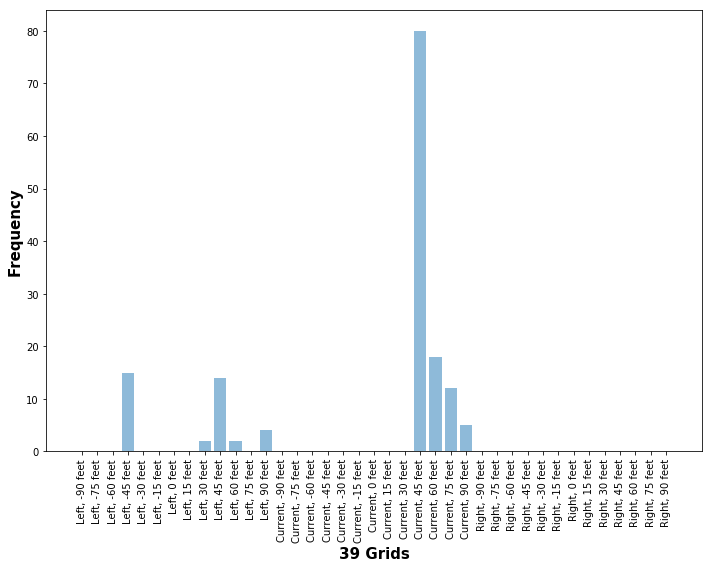

# Attention change by time for a single vehicle

In [ ]:
# based on nbr_loc sum by row, we know whether they are in congestion or not
# visualize by lane 
# large prediction error 
# less braking vs frequent braking
# vehicle class